In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
%matplotlib widget

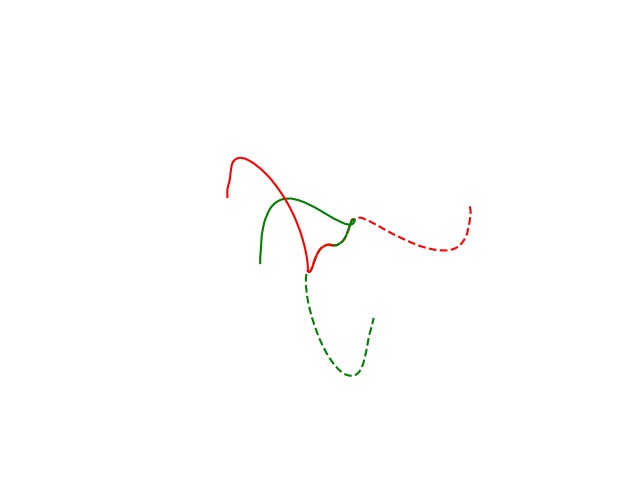

In [5]:
data = np.load('pca_data/2020-04-10_cb_simple_3areas_seed=7_data.npy')
conds = np.load('pca_data/2020-04-10_cb_simple_3areas_seed=7_conds.npy')
num_timesteps = 350
wstart = 70
wend = 100
window_times = np.arange(wstart, num_timesteps-wend)

def plot_pca_coherence_avg(data, area, plot3d):

    green_left = []
    red_left = []
    green_right = []    
    red_right = []

    colors = ['g', 'r']
    linestyles = ['--', '-']
    
    area_data = data[100*(area-1):100*area, :]
    for i, c in enumerate(conds):
        # checkerboard is green, and reach direction is left 
        if c[0] == -1 and c[1] <= 108:
            green_left.append(area_data[:, i])
        # checkerboard is red, and reach direction is left 
        if c[0] == -1 and c[1] > 108:
            red_left.append(area_data[:, i])
        # checkerboard is green, and reach direction is right
        if c[0] == 1 and c[1] <= 108:
            green_right.append(area_data[:, i])
        # checkerboard is red, and reach direction is right 
        if c[0] == 1 and c[1] > 108:
            red_right.append(area_data[:, i])

    pca_data = np.hstack((np.mean(np.stack(green_left),axis=0), np.mean(np.stack(red_left),axis=0), 
    np.mean(np.stack(green_right),axis=0), np.mean(np.stack(red_right),axis=0))).T

    pca = PCA(n_components=3)
    area_data_3d = pca.fit_transform(pca_data)
    area_data_3d_reshape = area_data_3d.reshape(4, 350, 3)
    
    if plot3d:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        i = 0 
        for l in linestyles:
            for c in colors:
                ax.plot(area_data_3d_reshape[i, window_times, 0], area_data_3d_reshape[i, window_times, 1], area_data_3d_reshape[i, window_times, 2], color=c, linestyle=l)
                i+=1
        ax.set_axis_off()


    else:
        i = 0 
        for l in linestyles:
            for c in colors:
                plt.plot(area_data_3d_reshape[i, window_times, 0], area_data_3d_reshape[i, window_times, 1], color=c, linestyle=l)
                i+=1
        plt.xticks([])
        plt.yticks([])
    
plot_pca_coherence_avg(data, 1, True)
